## **July 2, 2020: v2: Adding ZI tools with KT additions**

### **This reads in the matched catalog from SDSS_PS1_matching_KTv1.ipynb**
### Generate plots comparing SDSS with PS1


### **Use stripe82calibStars_v3.2.dat, from ZI, June 13**

### **This is a copy of ZI's gaia matching code, modified by KT to sdss_PS1_matching_KTv1**


In [1]:
# GENERAL PURPOSE PACKAGES
import os
import glob
import tarfile
from urllib.request import urlretrieve
from datetime import date
import timeit


import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
# Import ZI tools
%load_ext autoreload
%autoreload 2
# importing ZI tools: 
# import ZItools as zit

# importing ZI tools with KT changes:
import KTtools as ktt


In [3]:
# NOT NEEDED ANY MORE, NO MATCHING OF CATALOGS DONE
# import pyspherematch

### **Define prog constants**

In [4]:
# MATCH RAD FOR PYSPHEREMATCH
tol_asec = 3. # matching radius in arc.sec
tol_deg = tol_asec/3600.

# MAX PERMITTED MAG ERROR
max_MAGerr = 0.05



### **Define dirs, cats, etc**

In [5]:
homedir = '/home/user/SDSS_SSC/'
datadir = homedir+'DataDir/'

# matched SDSS + PS1 catalogs
nSSC2PS1 = datadir+'nSSC2PS1_matchedv1.csv'

# SDSS 2020: USE THIS VERSION ONLY - FROM ZI ON JUNE, 13, 2020
newSSC2020_cat = datadir+'stripe82calibStars_v3.2.dat'

# DO NOT USE THese earlier VERSIONs
# SDSS 2020: USE THIS VERSION ONLY - FROM ZI ON JUNE, 9, 2020
# newSSC2020_cat = 'stripe82calibStars_v3.1.dat'
# newSSC2020_cat = 'N2020_stripe82calibStars.dat'

# PS1 
PS1_cat = datadir+'PS1_STARS_Stripe82_area.csv'

### **Define header, format, etc**

NOTE: PS1 header is given in the first row

In [6]:
colnames = ['ra','dec','nEpochs','g_Nobs','g_mMed','g_mErr',
            'r_Nobs','r_mMed','r_mErr','i_Nobs','i_mMed','i_mErr',
            'z_Nobs','z_mMed','z_mErr','raMean','decMean',
            'gMeanPSFMag','gMeanPSFMagErr','gMeanPSFMagNpt',
            'rMeanPSFMag','rMeanPSFMagErr','rMeanPSFMagNpt',
            'iMeanPSFMag','iMeanPSFMagErr','iMeanPSFMagNpt',
            'zMeanPSFMag','zMeanPSFMagErr','zMeanPSFMagNpt']

Ndtype = {'nEpochs':'int64','g_Nobs':'int64',\
          'r_Nobs':'int64','i_Nobs':'int64','z_Nobs':'int64',\
          'gMeanPSFMagNpt':'int64','rMeanPSFMagNpt':'int64',\
          'iMeanPSFMagNpt':'int64','zMeanPSFMagNpt':'int64'}

### **Read in the matched 2020 SSC + PS1 cat** 

In [7]:
%%time
n2020PS1 = pd.read_csv(nSSC2PS1,header=0,dtype=Ndtype,comment='#')
nrows,ncols = n2020PS1.shape
print('N2020+PS1, as read: num rows, cols: ',nrows,ncols)


N2020+PS1, as read: num rows, cols:  943185 29
CPU times: user 7.27 s, sys: 804 ms, total: 8.07 s
Wall time: 8.07 s


### **Print out header and info of N2020PS1 cat as needed**

In [8]:
n2020PS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943185 entries, 0 to 943184
Data columns (total 29 columns):
ra                943185 non-null float64
dec               943185 non-null float64
nEpochs           943185 non-null int64
g_Nobs            943185 non-null int64
g_mMed            943185 non-null float64
g_mErr            943185 non-null float64
r_Nobs            943185 non-null int64
r_mMed            943185 non-null float64
r_mErr            943185 non-null float64
i_Nobs            943185 non-null int64
i_mMed            943185 non-null float64
i_mErr            943185 non-null float64
z_Nobs            943185 non-null int64
z_mMed            943185 non-null float64
z_mErr            943185 non-null float64
raMean            943185 non-null float64
decMean           943185 non-null float64
gMeanPSFMag       943185 non-null float64
gMeanPSFMagErr    943185 non-null float64
gMeanPSFMagNpt    943185 non-null int64
rMeanPSFMag       943185 non-null float64
rMeanPSFMagErr    9

In [9]:
n2020PS1.head()

,ra,dec,nEpochs,g_Nobs,g_mMed,g_mErr,r_Nobs,r_mMed,r_mErr,i_Nobs,...,gMeanPSFMagNpt,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagNpt,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagNpt,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagNpt
0,0.221617,0.019706,15,14,22.908,0.042,14,21.452,0.019,14,...,1,21.4451,0.0713,11,20.6375,0.0119,15,20.2072,0.0404,13
1,0.263319,0.018051,15,15,21.903,0.018,15,20.516,0.009,14,...,8,20.5054,0.0201,20,19.5588,0.0085,13,19.1728,0.0089,14
2,0.389406,0.016915,15,14,21.232,0.011,12,19.714,0.007,15,...,9,19.7160,0.0171,20,18.5097,0.0067,13,17.9569,0.0138,10
3,0.470119,0.020044,15,14,20.640,0.008,12,19.269,0.006,13,...,8,19.2386,0.0093,20,18.1416,0.0069,12,17.6309,0.0099,6
4,0.665899,0.021191,14,13,21.960,0.021,13,20.684,0.011,13,...,6,20.6333,0.0193,10,20.0305,0.0270,8,19.6467,0.0183,7


In [10]:
### code for generating new quantities, such as dra, ddec, colors, differences in mags, etc
### NOTE: matches IS A DATAFRAME WITH COL NAMES AS GIVEN IN THIS FUNCTIONS
def derivedColumns(matches):
    matches['dra'] = (matches['ra']-matches['raMean'])*3600
    matches['ddec'] = (matches['dec']-matches['decMean'])*3600
    ra = matches['ra'] 
    matches['raW'] = np.where(ra > 180, ra-360, ra) 
    matches['dg'] = matches['g_mMed'] - matches['gMeanPSFMag'] 
    matches['dr'] = matches['r_mMed'] - matches['rMeanPSFMag'] 
    matches['di'] = matches['i_mMed'] - matches['iMeanPSFMag'] 
    matches['dz'] = matches['z_mMed'] - matches['zMeanPSFMag'] 
    matches['gr'] = matches['g_mMed'] - matches['r_mMed']
    matches['ri'] = matches['r_mMed'] - matches['i_mMed']
    matches['gi'] = matches['g_mMed'] - matches['i_mMed']
    matches['iz'] = matches['i_mMed'] - matches['z_mMed']
    matches['dgr'] = matches['dg'] - matches['dr'] 
    matches['dri'] = matches['dr'] - matches['di'] 
    matches['diz'] = matches['di'] - matches['dz'] 
    matches['drz'] = matches['dr'] - matches['dz'] 
    matches['dgi'] = matches['dg'] - matches['di'] 
    return

### **Get value added cols**

### **IMPORTANT: ORIGINAL DF IS MODIFIED IN THIS CELL**

In [11]:
derivedColumns(n2020PS1)
n2020PS1.head()

,ra,dec,nEpochs,g_Nobs,g_mMed,g_mErr,r_Nobs,r_mMed,r_mErr,i_Nobs,...,dz,gr,ri,gi,iz,dgr,dri,diz,drz,dgi
0,0.221617,0.019706,15,14,22.908,0.042,14,21.452,0.019,14,...,-0.1102,1.456,0.840,2.296,0.515,0.5259,0.0324,0.0847,0.1171,0.5583
1,0.263319,0.018051,15,15,21.903,0.018,15,20.516,0.009,14,...,-0.0828,1.387,0.926,2.313,0.500,0.2429,-0.0206,0.1140,0.0934,0.2223
2,0.389406,0.016915,15,14,21.232,0.011,12,19.714,0.007,15,...,-0.1059,1.518,1.214,2.732,0.649,0.2357,0.0077,0.0962,0.1039,0.2434
3,0.470119,0.020044,15,14,20.640,0.008,12,19.269,0.006,13,...,-0.0749,1.371,1.122,2.493,0.591,0.2431,0.0250,0.0803,0.1053,0.2681
4,0.665899,0.021191,14,13,21.960,0.021,13,20.684,0.011,13,...,-0.0657,1.276,0.676,1.952,0.427,0.2616,0.0732,0.0432,0.1164,0.3348


###  **Function to plot one color (y-axis) versus various others pars (x-axis)** 

In [12]:
def doOneColor(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    # this is where the useable range of color specified by Xstr is defined
    # it's really a hack - these limits should be passed via kw... 
    xMin = 0.5
    xMax = 3.1
    nBinX = 52
    xBin, nPts, medianBin, sigGbin = ktt.fitMedians(xVec, yVec, xMin, xMax,nBinX, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    # This is for a scatter plot
    # ax.scatter(xVec, yVec, s=0.01, c='blue')
    # Replace with hist2D
    # get x,y-binning
    yMax,yMin = np.quantile(yVec, [0.99,0.01])
    yMax,yMin,nBinY = round(yMax,2),round(yMin,2),25
    xedges = np.linspace(xMin,xMax,nBinX+1,endpoint=False,dtype=float)
    yedges = np.linspace(yMin,yMax,nBinY+1,endpoint=False,dtype=float)
    Histo2D, xedges, yedges = np.histogram2d(xVec,yVec, bins=(xedges, yedges))
    Histo2D = Histo2D.T
    X, Y = np.meshgrid(xedges, yedges)
    # cs = ax.pcolormesh(X,Y, Histo2D, cmap='Greys')
    # cs = ax.pcolormesh(X,Y, Histo2D, cmap='plasma')
    cs = ax.pcolormesh(X,Y, Histo2D, cmap=kw['cmap'])

    #ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.scatter(xBin, medianBin, s=5.2, c='black', marker='+')
    # ax.set_xlim(0.4,3.2)
    # ax.set_ylim(-0.5,0.5)
    ax.set_xlim(xMin,xMax)
    ax.set_ylim(yMin,yMax)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    fig.colorbar(cs, ax=ax, shrink=0.9)
    # THERE IS NO ANALYTIC COLOR TERM: linear interpolation of the binned medians! 
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    # the following line corrects the trend given by the binned medians 
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    # note that we only use the restricted range of color for ZP analysis
    # 0.3 mag limit is to reject gross outliers
    goodC = d[(np.abs(d['colorresid'])<0.3)&(xVec>xMin)&(xVec<xMax)]
    
    ### plots 
    # RA
    print(' stats for RA binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_RA.png'
    Ylabel =kw['Ystr'] + ' residuals'
    kwOC = {"Xstr":'raW', "Xmin":-45, "Xmax":47, "Xlabel":'R.A. (deg)', \
          "Ystr":'colorresid', "Ymin":-0.07, "Ymax":0.07,"nBinY":25, "Ylabel":Ylabel, \
          "XminBin":-43, "XmaxBin":45, "nBinX":56, "Nsigma":3, "offset":0.01, \
          "plotName":plotName, "symbSize":kw['symbSize'], "cmap":kw['cmap']}
    ktt.plotdelMag_KT(goodC, kwOC)
    print('made plot', plotName)
    # Dec
    print('-----------')
    print(' stats for Dec binning medians:')
    plotName = plotNameRoot + '_Dec.png'
    kwOC = {"Xstr":'dec', "Xmin":-1.3, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.07, "Ymax":0.07,"nBinY":25, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBinX":52, "Nsigma":3, "offset":0.01, \
          "plotName":plotName, "symbSize":kw['symbSize'], "cmap":kw['cmap']}
    ktt.plotdelMag_KT(goodC, kwOC)
    print('made plot', plotName)
    # r SDSS
    print('-----------')
    print(' stats for SDSS r binning medians:')
    plotName = plotNameRoot + '_rmag.png'    
    kwOC = {"Xstr":'r_mMed', "Xmin":14.3, "Xmax":22.2, "Xlabel":'SDSS r (mag)', \
          "Ystr":'colorresid', "Ymin":-0.07, "Ymax":0.07,"nBinY":25, "Ylabel":Ylabel, \
          "XminBin":14.5, "XmaxBin":21.5, "nBinX":55, "Nsigma":3, "offset":0.01, \
          "plotName":plotName, "symbSize":kw['symbSize'], "cmap":kw['cmap']}
    ktt.plotdelMag_KT(goodC, kwOC)
    print('made plot', plotName)
    print('------------------------------------------------------------------')


### **Plot color offsets versus (g-i) color, also against ra, dec**

=========== WORKING ON: dr ===================
 stats for RA binning medians:
medianAll: 2.0000000000668192e-05 std.dev.All: 0.01825675799999741
N= 856237 min= -0.29990000000000094 max= 0.29998000000000113
median: -1.1499999998582848e-05 std.dev: 0.0028589446603791355
saved plot as: colorResidPS12_dr_RA.png


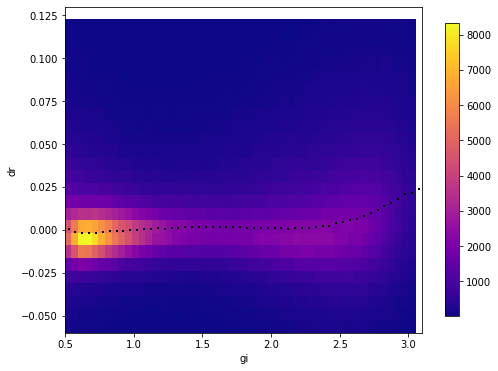

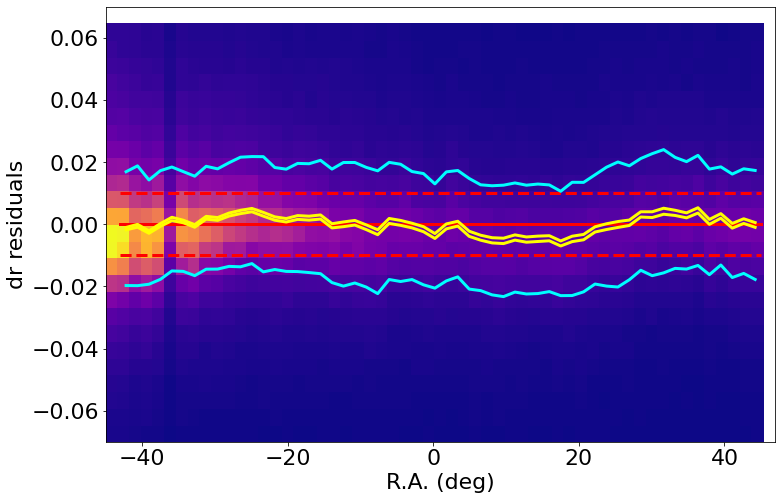

made plot colorResidPS12_dr_RA.png
-----------
 stats for Dec binning medians:
medianAll: 2.0000000000668192e-05 std.dev.All: 0.01825675799999741
N= 856237 min= -0.29990000000000094 max= 0.29998000000000113
median: -4.750000000006198e-05 std.dev: 0.0007682416833417156
saved plot as: colorResidPS12_dr_Dec.png


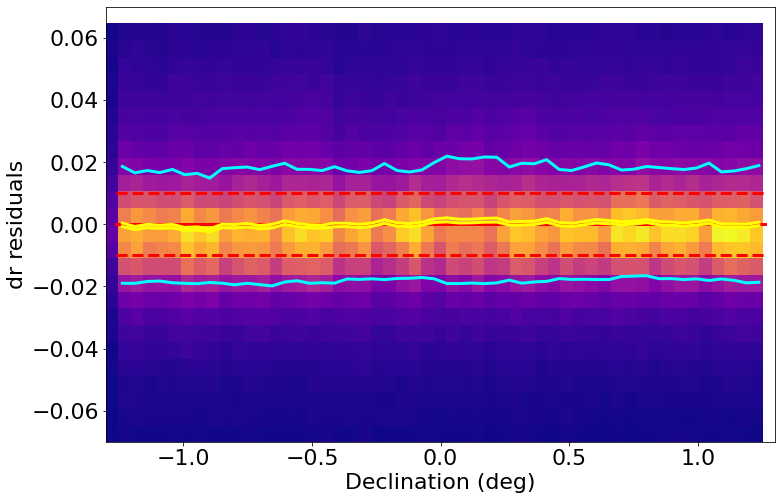

made plot colorResidPS12_dr_Dec.png
-----------
 stats for SDSS r binning medians:
medianAll: 2.0000000000668192e-05 std.dev.All: 0.01825675799999741
N= 856237 min= -0.29990000000000094 max= 0.29998000000000113
median: -0.0019539999999999584 std.dev: 0.009383685959672481
saved plot as: colorResidPS12_dr_rmag.png


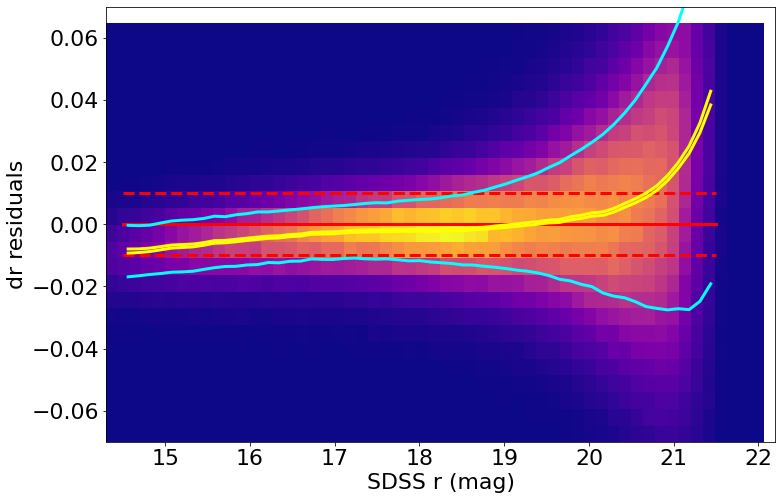

made plot colorResidPS12_dr_rmag.png
------------------------------------------------------------------
=========== WORKING ON: dgr ===================
 stats for RA binning medians:
medianAll: -0.0017379999999988793 std.dev.All: 0.03362806200000239
N= 815749 min= -0.29991200000000195 max= 0.29999999999999766
median: -0.002107000000000407 std.dev: 0.0029744684655816905
saved plot as: colorResidPS12_dgr_RA.png


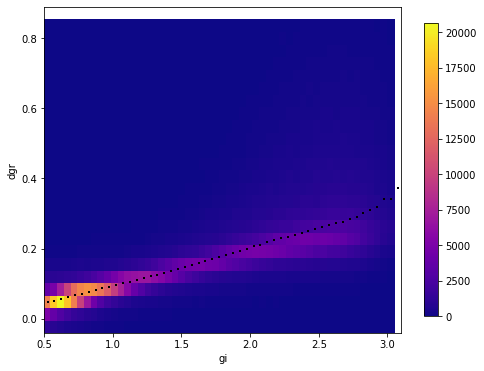

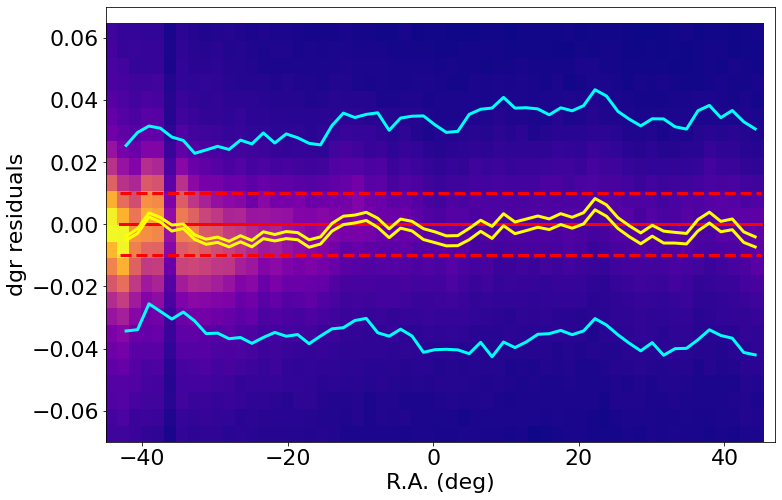

made plot colorResidPS12_dgr_RA.png
-----------
 stats for Dec binning medians:
medianAll: -0.0017379999999988793 std.dev.All: 0.03362806200000239
N= 815749 min= -0.29991200000000195 max= 0.29999999999999766
median: -0.0018414999999991407 std.dev: 0.0007914251682677641
saved plot as: colorResidPS12_dgr_Dec.png


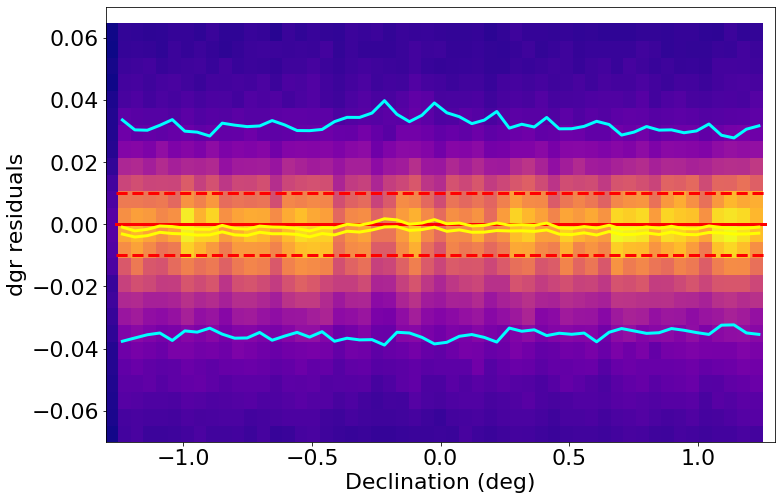

made plot colorResidPS12_dgr_Dec.png
-----------
 stats for SDSS r binning medians:
medianAll: -0.0017379999999988793 std.dev.All: 0.03362806200000239
N= 815749 min= -0.29991200000000195 max= 0.29999999999999766
median: -0.0038629999999971673 std.dev: 0.04272487875349098
saved plot as: colorResidPS12_dgr_rmag.png


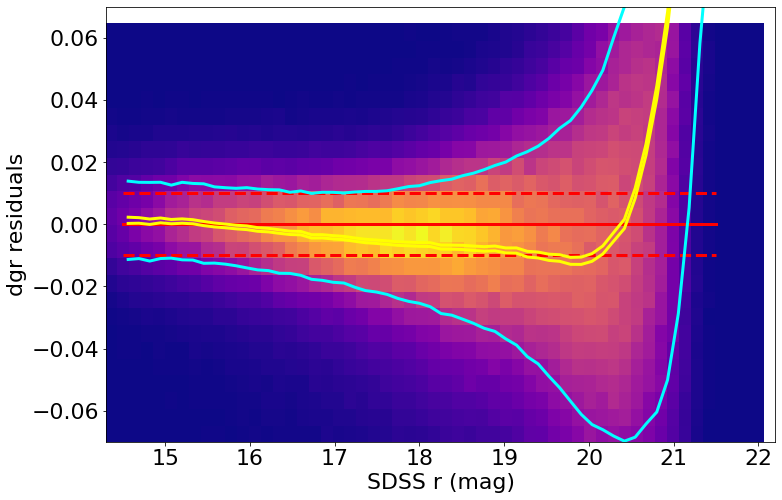

made plot colorResidPS12_dgr_rmag.png
------------------------------------------------------------------


In [14]:
# These keywords what you want to plot on x
keywords = {"Xstr":'gi', "plotNameRoot":'colorResidPS12_'}

# These keywords are for plot style
keywords["symbSize"] = 0.05
keywords["cmap"] = 'plasma' # gives a good dark background for the overplots
# keywords["cmap"] = 'PuBuGn' # the overplots look washed out

# create a series of plots
# for color in ('dg', 'dr', 'di', 'dz', 'dgr', 'dri', 'diz'):
for color in ('dr', 'dgr'): # use this for testing
    keywords["Ystr"] = color 
    doOneColor(n2020PS1, keywords)